hello


In [ ]:
#Cần sửa 1 số chỗ

75


In [1]:
from google.colab import drive
drive.mount ('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image #Thư viện xử lý ảnh

import os
import random

#Hai thư viện chuyên xử lý ảnh và CNN
import keras
import tensorflow as tf


from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input, Rescaling
from keras.preprocessing import image_dataset_from_directory

#Thao tác với tệp
from os import path
import shutil




In [ ]:
##có 2 cách để làm đưa DL lên drive

In [3]:
!unzip '/content/drive/MyDrive/Colab Notebooks/DogCat/dogs-vs-cats.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/DogCat/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [4]:
!unzip '/content/test1.zip'
!unzip '/content/train.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [5]:
#Lấy ảnh vào tập train
img_list = os.listdir('/content/train')


In [6]:
len(os.listdir('/content/test1')) #xem kích thước test
len(img_list) #xem kích thước train

25000

In [ ]:
'''
###Thật ra lúc đầu định tạo các dataFrame, nhưng cuối cùng lại không dùng đến, nên code block này đang vô nghĩa
# Tạo danh sách các tên file hình ảnh và gán nhãn tương ứng
data = []
for img_filename in img_list:
    label = 0 if img_filename.startswith('cat') else 1  # Gán nhãn 0 cho mèo và 1 cho chó
    data.append((img_filename, label))

import pandas as pd

# Chuyển đổi mảng data thành DataFrame
df = pd.DataFrame(data, columns=['filename', 'label'])

# In ra thông tin của DataFrame
print(df.info())
print(df.head())
'''


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  25000 non-null  object
 1   label     25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None
        filename  label
0   cat.4355.jpg      0
1   cat.2471.jpg      0
2  cat.11824.jpg      0
3  dog.12057.jpg      1
4   cat.6369.jpg      0


In [7]:
#Chia dữ liệu train thành 2 tập (2 tensor) tương ứng với nhãn đã được gán
cats_images = [img for img in img_list if img.startswith('cat')]
dogs_images = [img for img in img_list if img.startswith('dog')]
len(cats_images), len(dogs_images)

(12500, 12500)

In [8]:
# Pha trộn ngẫu nhiên các cat_image và các dog_image bên trong từng tensor
np.random.shuffle(cats_images)
np.random.shuffle(dogs_images)

# lấy số lượng train thật sự, và số lượng val
threshold = int(0.8 * len(cats_images))
train_cats, val_cats = np.split(cats_images, [threshold])
train_dogs, val_dogs = np.split(dogs_images, [threshold])
print(len(train_cats), len(val_cats), len(train_dogs), len(val_dogs))


10000 2500 10000 2500


In [9]:
#Tạo các thư mục mới
train_dir = '/content/train'
val_dir = '/content/val'
for d in [train_dir, val_dir]:
    if not path.exists(d):
        os.mkdir(d)
train_dog_dir = path.join(train_dir, 'dog')
train_cat_dir = path.join(train_dir, 'cat')
val_dog_dir = path.join(val_dir, "dog")
val_cat_dir = path.join(val_dir, "cat")
for d in [train_dog_dir, train_cat_dir, val_dog_dir, val_cat_dir]:
    if not path.exists(d):
        os.mkdir(d)

In [10]:
##Thực hiện chuyển dữ liệu vào các thư mục vừa tạo
# Dữ liệu train
for img_filename in train_cats:
    src_path_cats = path.join('/content/train', img_filename)
    dest_path_cats = path.join(train_cat_dir, img_filename)
    shutil.move(src_path_cats, dest_path_cats)

for img_filename in train_dogs:
    src_path_dogs = path.join('/content/train', img_filename)
    dest_path_dogs = path.join(train_dog_dir, img_filename)
    shutil.move(src_path_dogs, dest_path_dogs)

# Dữ liệu val
for img_filename in val_cats:
    src_path_cats = path.join('/content/train', img_filename)
    dest_path_cats = path.join(val_cat_dir, img_filename)
    shutil.move(src_path_cats, dest_path_cats)

for img_filename in val_dogs:
    src_path_dogs = path.join('/content/train', img_filename)
    dest_path_dogs = path.join(val_dog_dir, img_filename)
    shutil.move(src_path_dogs, dest_path_dogs)




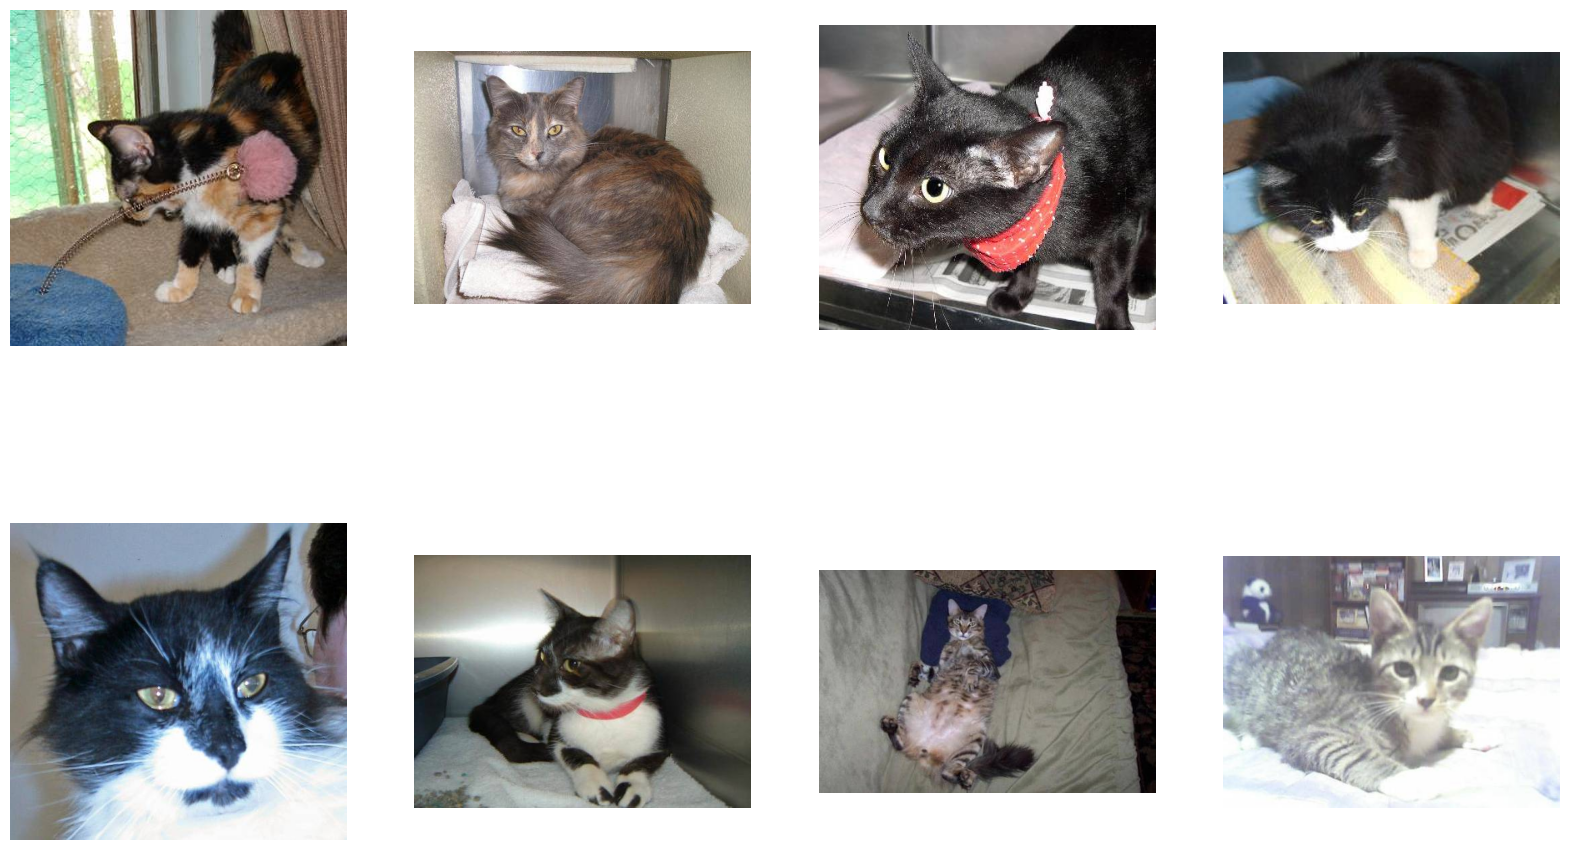

In [11]:
# xem một vài dữ liệu
fig, ax = plt.subplots(2,4,figsize=(20,12))
for i in range(8):
    img_filename = random.choice(train_cats)
    img_path = os.path.join(train_cat_dir, img_filename)  #in ra vài con mèo
    img = Image.open(img_path)
    ax[i//4, i%4].imshow(img)
    ax[i//4, i%4].axis('off')


In [12]:
BATCH_SIZE = 64
WIDTH = 224
HEIGHT = 224
CHANNELS = 3
##Hàm image_dataset_from_directory được lấy từ thư viện keras, tensorflow với mục đich lấy ảnh và đánh label tự động
#Ở đây, inferred tức là lấy ảnh từ file vào và đánh nhãn cho nó, nếu chế độ None là không đánh nhãn
#Còn binary sẽ đánh nhãn 0,1 theo alphabet; vì vậy mà cat là 0, dog là 1
# training data generator
train_ds = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',  #Gán nhãn nhị phân -> sẽ tự động gán 0 hay 1 cho dog và cat
    color_mode='rgb', #3 bảng màu
    image_size=(HEIGHT,WIDTH),  # 224*224 - cũng là sự đảm bảo chuẩn hóa cho tất cả các ảnh đều có kích thước 224x224 pixels
    batch_size=BATCH_SIZE #Lấy ngẫu nhiên 64 điểm quan sát cho 1 lần HL -> ko lấy All hay SGD
)

# validation data generator
val_ds = image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='binary',
    color_mode='rgb',
    image_size=(HEIGHT,WIDTH),
    batch_size=BATCH_SIZE
)




Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Label của ảnh đầu tiên trong tập dữ liệu huấn luyện:
[1.]


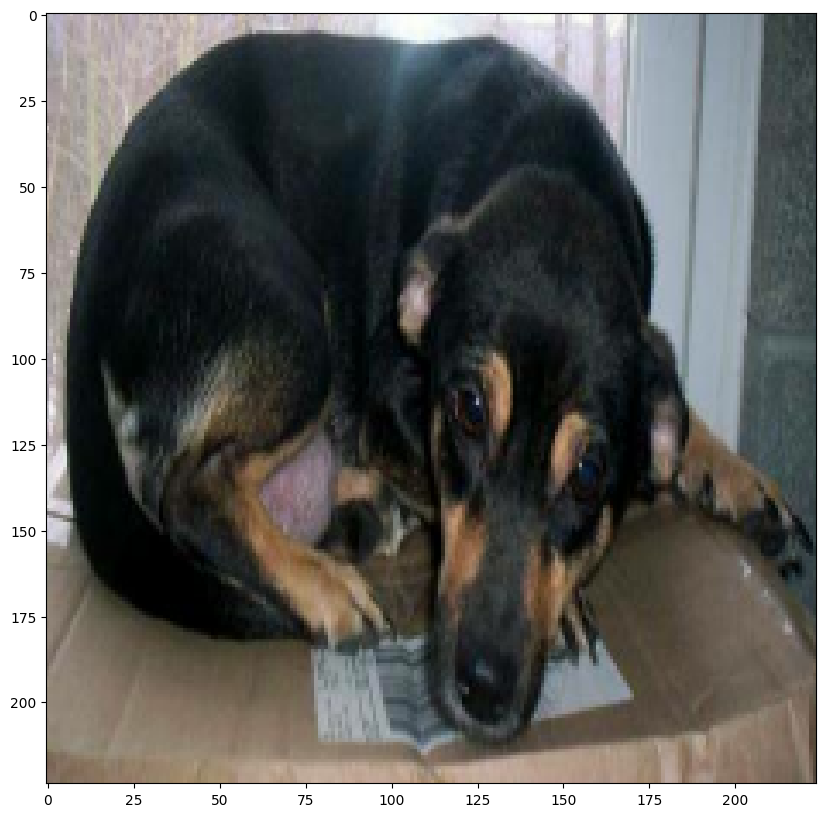


Mẫu từ tập dữ liệu kiểm tra:


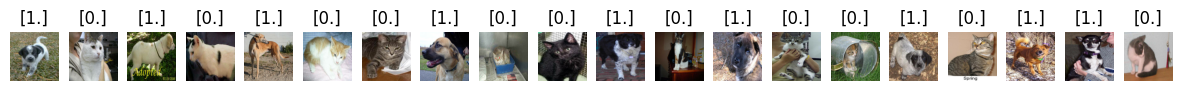

In [13]:
#Kiểm tra cái nào đi với nhãn nào - thật ra biết rõ cat-0 và dog-1 rồi
# In ra một số mẫu từ tập dữ liệu huấn luyện và kiểm tra để xác định lớp "positive"
for images, labels in train_ds.take(1):  # Lấy một lô dữ liệu từ tập huấn luyện
    print("Label của ảnh đầu tiên trong tập dữ liệu huấn luyện:")
    print(labels[0].numpy())  # In ra nhãn
    plt.figure(figsize=(15, 10))
    plt.imshow(images[0].numpy().astype("uint8"))  # Hiển thị hình ảnh
    plt.show()


# In ra một số mẫu từ tập dữ liệu huấn luyện và kiểm tra kèm theo nhãn
def show_images_labels(dataset, num_samples=20): #In có 20 ảnh thôi
    plt.figure(figsize=(15, 10))
    for images, labels in dataset.take(1):  # Lấy một lô dữ liệu từ tập dataset
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))  # Hiển thị hình ảnh
            plt.title(labels[i].numpy())
            plt.axis("off")

print("\nMẫu từ tập dữ liệu kiểm tra:")
show_images_labels(val_ds)


In [14]:
#Khởi tạo model
model = keras.Sequential(
    [
        Rescaling(1./255, input_shape=(HEIGHT, WIDTH, CHANNELS)), # Do giá trị ban đầu ảnh màu [0..255]x[0..255]x3(rbg)

        #Lớp Conv đầu tiên sẽ tự ngầm hiểu chanels = 3(rgb), sau đó với 64 filters tạo ra 64 features, sau đó được giảm chiều 2 lần qua maxPool
        Conv2D(64, (3,3), activation='relu'),
        MaxPool2D(2,2),

        Conv2D(128, (3,3), activation='relu'),  # lớp conv tiếp theo có 128 filters và 64 chanels
        MaxPool2D(2,2),

        Conv2D(256, (3,3), activation='relu'),
        Conv2D(256, (3,3), activation='relu'),
        MaxPool2D(2,2),

        Flatten(),  #Duỗi phẳng tensor thành 1 vector
        Dense(256, activation='relu'),  #fully-connected
        Dense(1, activation='sigmoid')  #lưu ý, hàm cuối cùng là sigmoid, ko phải softmax, nên chỉ in đầu ra của 1 trong 2 cái, và ranh giới 0.5 để phân chia
    ]
)

In [15]:
#autotune tối ưu hiệu suất mô hình
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)  #prefetch giúp song song hóa các tiến trình
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [16]:
#Thêm cho model các độ đo, cách tính, ...
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
#Xem model tổng quan
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       2

In [19]:
# Huấn luyện mô hình
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
313/313 [==============================] - 100s 315ms/step - loss: 0.6878 - accuracy: 0.5261 - val_loss: 0.6920 - val_accuracy: 0.5070
Epoch 2/10
313/313 [==============================] - 89s 284ms/step - loss: 0.6830 - accuracy: 0.5625 - val_loss: 0.6885 - val_accuracy: 0.5256
Epoch 3/10
313/313 [==============================] - 93s 295ms/step - loss: 0.6543 - accuracy: 0.6026 - val_loss: 0.6619 - val_accuracy: 0.5760
Epoch 4/10
313/313 [==============================] - 91s 288ms/step - loss: 0.5661 - accuracy: 0.6981 - val_loss: 0.5302 - val_accuracy: 0.7382
Epoch 5/10
313/313 [==============================] - 93s 295ms/step - loss: 0.4808 - accuracy: 0.7653 - val_loss: 0.4863 - val_accuracy: 0.7698
Epoch 6/10
313/313 [==============================] - 90s 287ms/step - loss: 0.4192 - accuracy: 0.8023 - val_loss: 0.4447 - val_accuracy: 0.7986
Epoch 7/10
313/313 [==============================] - 92s 293ms/step - loss: 0.3685 - accuracy: 0.8348 - val_loss: 0.4409 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


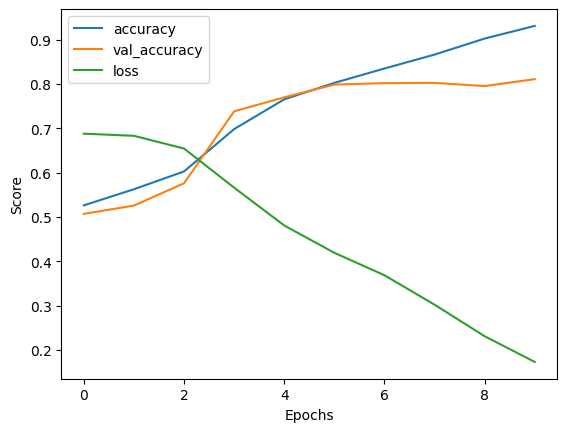

In [20]:
#Trực quan hóa
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])


plt.ylabel("Score")
plt.xlabel("Epochs")
plt.legend(["accuracy", "val_accuracy", "loss"])
print(history.history.keys())
plt.show()

In [22]:
print("Training Accuracy: ", model.evaluate(train_ds, verbose=None)[1])
print("Validation Accuracy: ", model.evaluate(val_ds, verbose=None)[1])
##Đến đây thì mô hình khá tồi, mới chính xác khoảng 90% - lần tới sẽ thay đổi model và train lại

Training Accuracy:  0.9143999814987183
Validation Accuracy:  0.8108000159263611


In [23]:
model.save('/content/drive/MyDrive/Colab Notebooks/DogCat/cat&dog1.h5') # lưu model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
from keras.models import load_model #Load model đã saved
model = load_model('/content/drive/MyDrive/Colab Notebooks/DogCat/cat&dog1.h5')

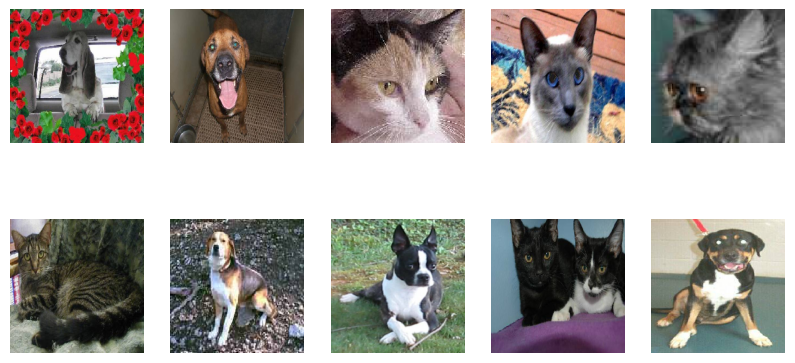

In [25]:
from keras.preprocessing import image

##Dự đoán
#Chuẩn bị dữ liệu test1

test1_dir = '/content/test1'
prediction_img_filenames = os.listdir(test1_dir)
prediction_imgs = []

# Lặp qua từng tên tệp trong danh sách
for filename in prediction_img_filenames:
    img_path = os.path.join(test1_dir, filename)  # Tạo đường dẫn đầy đủ đến tệp ảnh
    img = image.load_img(img_path, target_size=(224, 224))  # Load ảnh với đường dẫn đầy đủ và kích thước đã chỉ định
    # Thêm hình ảnh vào danh sách
    prediction_imgs.append(img)

# In ra 10 ảnh
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(prediction_imgs[i])
    plt.axis('off')
plt.show()


In [26]:
prediction_imgs = np.array(prediction_imgs)
print (prediction_imgs)

[[[[  4  92  32]
   [  0  77  22]
   [  7  79  33]
   ...
   [ 48  92  67]
   [ 38  85  51]
   [ 45  91  55]]

  [[ 23  82  38]
   [ 20  85  42]
   [ 16  81  39]
   ...
   [ 61 107  81]
   [ 35  80  47]
   [ 38  79  45]]

  [[ 48  74  47]
   [ 40  87  53]
   [ 16  81  39]
   ...
   [ 41  85  60]
   [ 62 101  70]
   [ 56  93  60]]

  ...

  [[ 52 108  69]
   [ 46  98  60]
   [ 59 106  70]
   ...
   [ 71 125  89]
   [ 82 134  95]
   [ 90 141 100]]

  [[ 58 114  75]
   [ 51 103  65]
   [ 71 118  82]
   ...
   [ 61 105  70]
   [ 87 138  97]
   [ 90 141 100]]

  [[ 62 118  79]
   [ 72 124  86]
   [ 88 135  99]
   ...
   [ 73 113  78]
   [ 84 132  92]
   [ 79 127  87]]]


 [[[124 125 111]
   [122 123 109]
   [120 121 107]
   ...
   [ 65  65  53]
   [ 64  65  51]
   [ 66  67  53]]

  [[124 125 111]
   [122 123 109]
   [120 121 107]
   ...
   [ 66  66  54]
   [ 65  66  52]
   [ 67  68  54]]

  [[124 125 111]
   [122 123 109]
   [120 121 107]
   ...
   [ 67  67  55]
   [ 66  67  53]
   [ 68  69

1/1 [==============================] - 0s 24ms/step
Cat: 0.995274
Cat: 0.999737
Cat: 0.650756
Cat: 0.013143
Cat: 0.527366
Cat: 0.000173
Cat: 0.999978
Cat: 0.997839
Cat: 0.126140
Cat: 0.999605
Cat: 0.000002
Cat: 0.596990
Cat: 0.999999
Cat: 0.751784
Cat: 0.042608
Cat: 0.453513
Cat: 0.104465
Cat: 0.955779
Cat: 0.991723
Cat: 0.328567
Cat: 0.231156
Cat: 0.038506
Cat: 0.999628
Cat: 0.000181
Cat: 0.999742
Cat: 0.995065
Cat: 0.905134
Cat: 0.002105
Cat: 0.668882
Cat: 0.000171


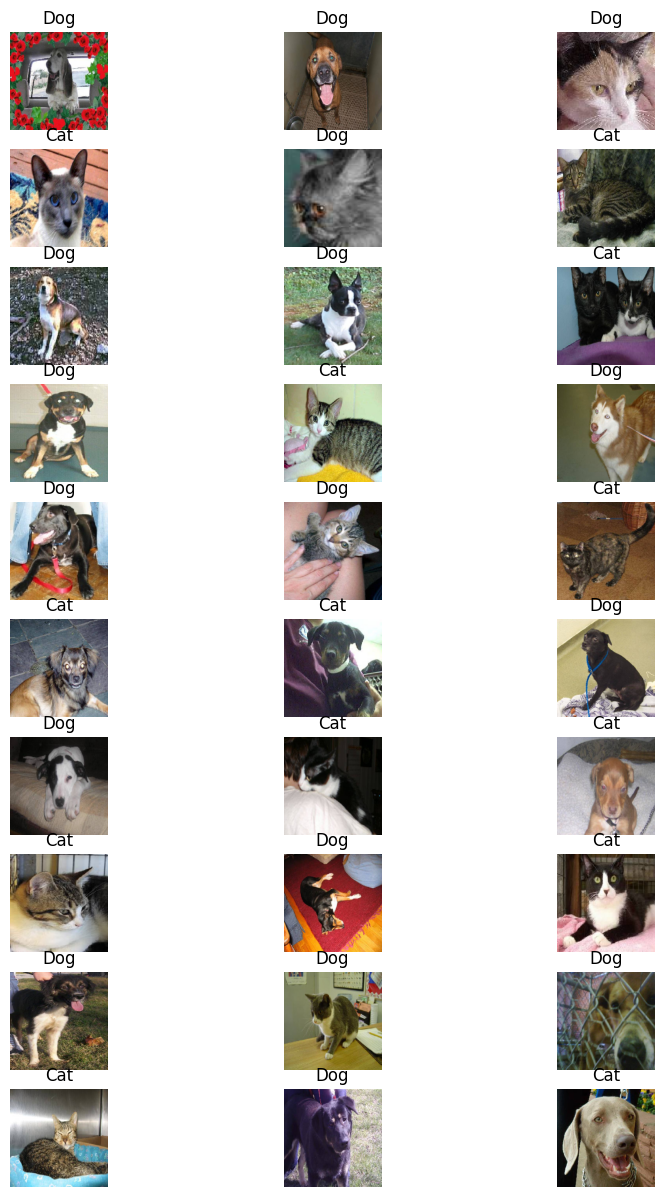

In [32]:
# Hiển thị ảnh và xác suất dự đoán
predictions = model.predict(prediction_imgs[:30])

plt.figure(figsize=(10, 15))
for i in range(30):
    plt.subplot(10, 3, i + 1)
    plt.imshow(prediction_imgs[i])
    print(f'Cat: {predictions[i][0]:.6f}')
    if(predictions[i][0]<0.5):
      plt.title('Cat')
    else:
      plt.title('Dog')
    plt.axis('off')
plt.show()
